#### Condition Monitoring of Single Phase Induction motors using Discrete wavelet transform, Motion Amplification Video and Artificial Neural Network
#### Dataset: [Induction Motor Faults dataset](https://www.kaggle.com/uysalserkan/fault-induction-motor-dataset)


#### Training the Artificial neural network on the Induction Motor Faults dataset


#### Prepare Data

In [1]:
import numpy as np
import pandas as pd
import glob 

In [2]:
cur_path = "/kaggle/input/fault-induction-motor-dataset/imbalance/"

In [3]:
normal_file_names = glob.glob("/kaggle/input/fault-induction-motor-dataset/normal/"+'/normal/*.csv')
imnormal_file_names_6g = glob.glob(cur_path+'/imbalance/6g/*.csv')
imnormal_file_names_10g = glob.glob(cur_path+'/imbalance/10g/*.csv')
imnormal_file_names_15g = glob.glob(cur_path+'/imbalance\\15g/*.csv')
imnormal_file_names_20g = glob.glob(cur_path+'/imbalance\\20g/*.csv')
imnormal_file_names_25g = glob.glob(cur_path+'/imbalance\\25g/*.csv')
imnormal_file_names_30g = glob.glob(cur_path+'/imbalance\\30g/*.csv')

In [4]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [5]:
data_n = dataReader(normal_file_names)
data_6g = dataReader(imnormal_file_names_6g)
data_10g = dataReader(imnormal_file_names_10g)
data_15g = dataReader(imnormal_file_names_15g)
data_20g = dataReader(imnormal_file_names_20g)
data_25g = dataReader(imnormal_file_names_25g)
data_30g = dataReader(imnormal_file_names_30g)

In [6]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250000 entries, 0 to 12249999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
dtypes: float64(8)
memory usage: 747.7 MB


##### Down Sampling

In [7]:
def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [8]:
data_n = downSampler(data_n, 0, 5000)
data_6g = downSampler(data_6g, 0, 5000)
data_10g = downSampler(data_10g, 0, 5000)
data_15g = downSampler(data_15g, 0, 5000)
data_20g = downSampler(data_20g, 0, 5000)
data_25g = downSampler(data_25g, 0, 5000)
data_30g = downSampler(data_30g, 0, 5000)

In [9]:
data_n

,0,1,2,3,4,5,6,7
0,0.068100,0.011065,0.017430,0.001620,-0.059850,0.000868,-0.088720,0.010209
1,-0.045139,0.015286,-0.010404,-0.000644,0.426827,0.005168,0.155058,0.013550
2,-0.064635,0.029477,0.002314,0.001339,0.232491,0.005660,0.390845,0.009958
3,0.089400,-0.002910,0.002770,-0.002331,-0.116512,-0.003224,0.219854,0.012501
4,-0.070240,0.008164,-0.012449,0.002579,0.367824,0.008202,0.343822,0.010695
...,...,...,...,...,...,...,...,...
2445,0.014942,0.010274,0.000469,0.002580,0.138325,0.026142,0.336499,0.009176
2446,-0.078864,0.016197,0.001844,-0.000609,0.105457,0.016553,0.583317,0.011419
2447,-0.026635,0.000749,0.000612,0.002510,0.044352,0.010177,0.540934,0.012321
2448,0.016440,-0.018926,-0.010451,-0.003154,-0.053072,-0.011704,0.407358,0.012750


In [10]:
from scipy import signal
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [11]:
data_n = FFT(data_n)
data_6g = FFT(data_6g)
data_10g = FFT(data_10g)
data_15g = FFT(data_15g)
data_20g = FFT(data_20g)
data_25g = FFT(data_25g)
data_30g = FFT(data_30g)

In [12]:
y_1 = pd.DataFrame(np.ones(int(len(data_n)),dtype=int))
y_2 = pd.DataFrame(np.zeros(int(len(data_6g)),dtype=int))
y_3 = pd.DataFrame(np.full((int(len(data_10g)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_15g)),1),3))
y_5 = pd.DataFrame(np.full((int(len(data_20g)),1),4))
y_6 = pd.DataFrame(np.full((int(len(data_25g)),1),5))
y_7 = pd.DataFrame(np.full((int(len(data_30g)),1),6))
y = pd.concat([y_1,y_2,y_3,y_4,y_5,y_6,y_7], ignore_index=True)
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
14592,2
14593,2
14594,2
14595,2


In [13]:
data = pd.concat([data_n,data_6g,data_10g,data_15g,data_20g,data_25g,data_30g],ignore_index=True)

In [14]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.001828,0.001407,0.000633,0.000314,-0.018471,-0.006255,-0.023785,-0.004148,0.010819,0.001846,0.036653,-0.000102,0.021376,-0.003523,0.000117
1,-0.000092,-0.001432,-0.000654,-0.000817,0.017794,0.004692,0.043053,0.006219,-0.091761,-0.015580,-0.162975,-0.005451,-0.074709,0.001488,0.000286
2,-0.004291,0.000600,0.000154,0.000394,0.036423,-0.008018,0.044729,0.006493,-0.079549,-0.016486,-0.024822,-0.011557,-0.080927,0.013979,0.000413
3,-0.002831,0.002876,-0.000647,-0.000118,-0.019607,-0.008133,-0.019475,0.023109,0.030703,0.006767,0.241628,-0.002068,0.137273,0.022686,0.000554
4,0.005883,-0.004571,0.000293,-0.000323,-0.018166,0.018915,0.011407,0.028656,-0.033670,-0.006434,0.141389,0.001693,0.277524,0.031725,0.000653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14592,0.050841,-0.001199,-0.042428,-0.008389,0.019381,0.001680,-0.037938,-0.006888,0.018557,-0.001148,0.037971,0.011060,0.301278,0.019343,0.000743
14593,-0.039864,-0.000289,0.038271,0.006271,-0.013570,-0.005292,0.072577,-0.050030,-0.016495,0.004072,0.029537,0.007080,0.227546,0.023958,0.000609
14594,0.032000,-0.004512,-0.031172,-0.002037,0.015251,0.002294,-0.007503,0.003530,-0.001903,-0.003692,0.025111,0.005673,0.073648,0.016902,0.000476
14595,-0.020229,0.000266,0.021548,0.001338,-0.004471,-0.002069,0.073994,-0.023696,-0.021018,0.002141,0.011911,0.002567,0.006474,0.013215,0.000310


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, shuffle=True)

In [16]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (10947, 15)
Shape of Test Data : (3650, 15)


#### ANN Learning
#### Build Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(15,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(7, activation='softmax',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 231       
Total params: 21,511
Trainable params: 21,511
Non-trainable params: 0
____________________________________________________

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

##### Train ANN

In [19]:
hist = model.fit(X_train , y_train , epochs=20, validation_split=0.2)

Epoch 1/20
274/274 [==============================] - 2s 5ms/step - loss: 1.3519 - accuracy: 0.3496 - val_loss: 0.9372 - val_accuracy: 0.4781
Epoch 2/20
274/274 [==============================] - 1s 2ms/step - loss: 0.7612 - accuracy: 0.6607 - val_loss: 0.2015 - val_accuracy: 0.9356
Epoch 3/20
274/274 [==============================] - 1s 2ms/step - loss: 0.1723 - accuracy: 0.9361 - val_loss: 0.1100 - val_accuracy: 0.9667
Epoch 4/20
274/274 [==============================] - 1s 2ms/step - loss: 0.1410 - accuracy: 0.9480 - val_loss: 0.0698 - val_accuracy: 0.9795
Epoch 5/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9722 - val_loss: 0.0411 - val_accuracy: 0.9858
Epoch 6/20
274/274 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9646 - val_loss: 0.0756 - val_accuracy: 0.9699
Epoch 7/20
274/274 [==============================] - 1s 2ms/step - loss: 0.0565 - accuracy: 0.9772 - val_loss: 0.0456 - val_accuracy: 0.9826
Epoch 

#### Plot training history

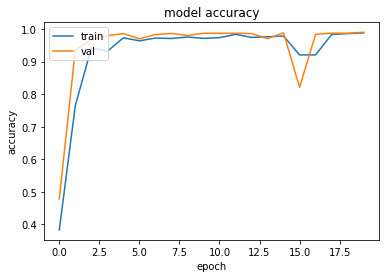

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

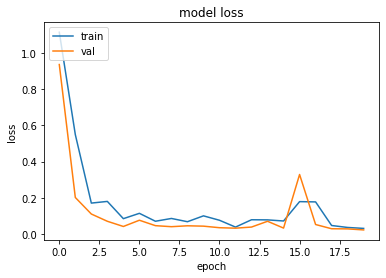

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# The trained ANN model is then passed to Matlab program